<h1 style= "color:green; text-align:center"> Web Mining and Applied NLP (44-620) </h1>

<h3 style= "color:orange; font-size:23px"> Web Mining Final Project</h3>

<p style= "color: orange; font-size: 18px"> Sudent Name: Curtis Rogers </p>

<p style= "color:orange; font-size:15px"> Github Repository Link: <a herf= "https://github.com/curt2023/web-mining-final">Web Mining Final Repository</a> </p>

<h3 style= "color:orange; font-size:23px; text-align:center"> Project Overview</h3>

<p> This summer I went to a Metallica concert with my son. This gave me the idea to investigate the lyric sentiments related to the Metallica album "Reload". This is an interesting topic for me because I am not really sure what to expect out of the results. The album should have a wide range of songs with varying sentiments. 

In [10]:
import json
import pickle
import numpy
import requests
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
import matplotlib.pyplot as plt
import math
import pandas as pd
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup

First I need to write all of the songs from the album into my notebook

In [4]:
def fetch_song(artist,title,filename):
    URL = f'https://api.lyrics.ovh/v1/{artist}/{title}'
    data = json.loads(requests.get(URL).text)
    with open(filename, 'w') as file:
        json.dump(data, file, indent=5)
    print(f'Saved file {filename}')



#fetch songs

fetch_song('Metallica', 'Fuel', 'Reload_Song_1')
fetch_song('Metallica', 'Better Than You', 'Reload_Song_2')
fetch_song('Metallica', 'Carpe Diem Baby', 'Reload_Song_3')
fetch_song('Metallica', 'Where The Wild Things Are', 'Reload_Song_4')
fetch_song('Metallica', 'Fixxxer', 'Reload_Song_5')
fetch_song('Metallica', 'The Memory Remains', 'Reload_Song_6')
fetch_song('Metallica', 'The Unforgiven II', 'Reload_Song_7')
fetch_song('Metallica', 'Slither', 'Reload_Song_8')
fetch_song('Metallica', 'Bad Seed', 'Reload_Song_9')
fetch_song('Metallica', 'Prince Charming', 'Reload_Song_10')
fetch_song('Metallica', 'Attitude', 'Reload_Song_11')

Saved file Reload_Song_1
Saved file Reload_Song_2
Saved file Reload_Song_3
Saved file Reload_Song_4
Saved file Reload_Song_5
Saved file Reload_Song_6
Saved file Reload_Song_7
Saved file Reload_Song_8
Saved file Reload_Song_9
Saved file Reload_Song_10
Saved file Reload_Song_11


Next I am going to investigate the sentiments related to each song.

In [5]:
def song_sentiment(filename):
    with open(filename, 'r') as file:
        data = json.load(file)
        song = data['lyrics']
    #Loads English Tokenizer
    nlp = spacy.load('en_core_web_sm')
    nlp.add_pipe('spacytextblob')

    #Document
    doc = nlp(song)

    #Sentiment analysis
    polarity_score = doc._.polarity

    print()
    print('*****************************************************************')
    print(f'the polarity score for {filename} is {polarity_score}')

#Song sentiment analysis

song_sentiment('Reload_Song_1')
song_sentiment('Reload_Song_2')
song_sentiment('Reload_Song_3')
song_sentiment('Reload_Song_4')
song_sentiment('Reload_Song_5')
song_sentiment('Reload_Song_6')
song_sentiment('Reload_Song_7')
song_sentiment('Reload_Song_8')
song_sentiment('Reload_Song_9')
song_sentiment('Reload_Song_10')
song_sentiment('Reload_Song_11')



*****************************************************************
the polarity score for Reload_Song_1 is 0.007081220061989302

*****************************************************************
the polarity score for Reload_Song_2 is 0.3982456140350877

*****************************************************************
the polarity score for Reload_Song_3 is 0.3517482517482517

*****************************************************************
the polarity score for Reload_Song_4 is 0.13423202614379082

*****************************************************************
the polarity score for Reload_Song_5 is 0.045535714285714284

*****************************************************************
the polarity score for Reload_Song_6 is -0.40271739130434786

*****************************************************************
the polarity score for Reload_Song_7 is -0.20343915343915348

*****************************************************************
the polarity score for Reload_Song_8 is -0

After that I would like to compile some of the variables and data that I am going to use to display the results of this investigation.

In [6]:
import statistics

all_scores = [0.007081220061989302,0.3982456140350877,0.3517482517482517,0.13423202614379082,0.045535714285714284,-0.40271739130434786,-0.20343915343915348,-0.2884126984126984,-0.3839826839826839,0.040977443609022564,-0.017361111111111112]


average_sentimate = statistics.mean(all_scores)
deviation= statistics.stdev(all_scores)
pos_deviation=[0.2411646408400981]
neg_deviation=[-0.29899968963394147]




song_list = ["Fuel","Better Than You","Carpe Diem Baby","Where The Wild Things Are","Fixxxer","The Memory Remains",
             "The Unforgiven II", "Slither","Bad Seed","Prince Charming","Attitude"]
positions=[1,2,3,4,5,6,7,8,9,10,11]







Below is the graph that was created to show the sentiment of each song along with the mean and standard deviations of the album.

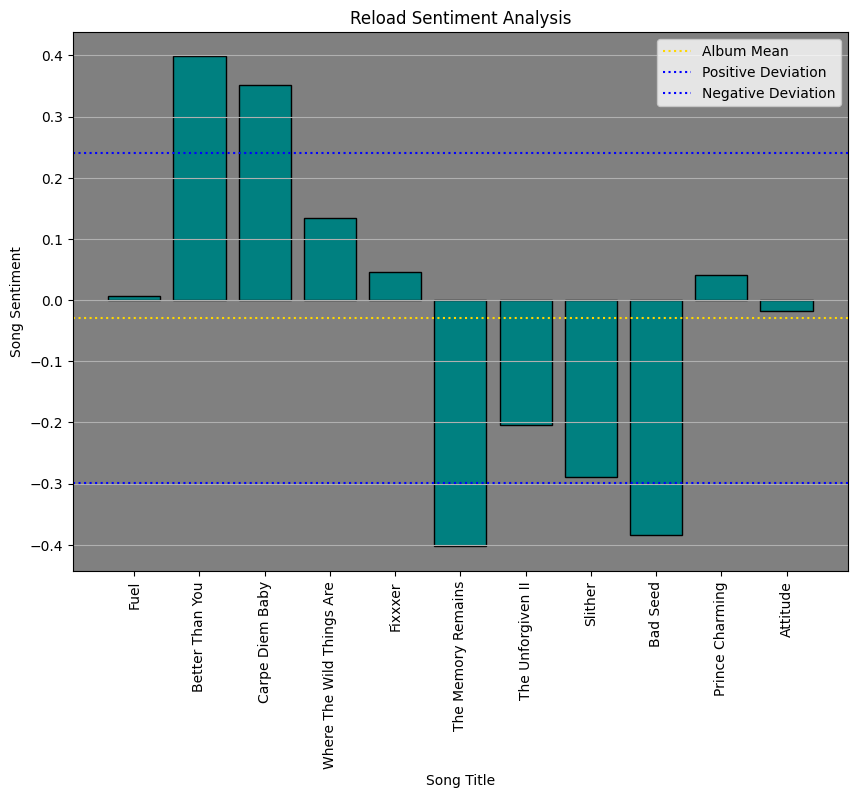

In [7]:

plt.figure(figsize=(10,7))
plt.title("Reload Sentiment Analysis")
plt.xlabel("Song Title")
plt.grid(axis="y")
plt.ylabel("Song Sentiment")
plt.bar(positions,all_scores, width=0.8, color="teal",edgecolor="black")
plt.gca().set_facecolor('gray')
plt.axhline(average_sentimate,color="gold",ls="dotted")
plt.axhline(pos_deviation,color="blue",ls="dotted")
plt.axhline(neg_deviation,color="blue",ls="dotted")
plt.xticks(positions,song_list,rotation='vertical')
plt.legend(['Album Mean','Positive Deviation','Negative Deviation'])
plt.show()

In [34]:
url= "https://www.kerrang.com/a-plea-for-metallicas-reload"

r=requests.get(url)
html=r.content

soup= BeautifulSoup(html,"html.parser")
article_text= soup.find_all('div', class_='html-output')


with open("article.html","w", encoding='utf-8') as file:
   file.write(str(article_text))



In [35]:
with open ('article.html',"r", encoding='utf-8') as file:
    article1=file.read()
    
soup = BeautifulSoup(article1, "html.parser")
text = soup.get_text()
print(text)

[Metallica’s Reload is the first album I ever bought with my own money. I was 12, I’d seen the Memory Remains video, and I’d saved up some allowance. To me, a kid whose previous dalliances into hard rock had been NIN and The Offspring, this album seemed awesome. It was bikerish and butch and a little stupid but in a fun way. I listened to it constantly and memorized all the lyrics.I was excited to get into this thing called 'metal'.
But upon meeting other, more entrenched metal kids, I quickly learned that I was wrong: Reload, in fact, sucked. It was a black mark on Metallica’s record, or rather part of the black mark that we were all living through at the time. To like that album was the metalhead equivalent of having a soul patch., In retrospect, I understand where those dudes were coming from (I mean, look at James' hair in that video). The Load/Reload era is rough times for Metallica fans, and the band didn’t make it any easier for us. To their credit, the ’90s was a weird era for 